In [232]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [233]:
q1_df = pd.read_csv('/Users/kaylahartman/Documents/Project_Two/311q1.csv')
q2_df = pd.read_csv('/Users/kaylahartman/Documents/Project_Two/311q2.csv')
q3_df = pd.read_csv('/Users/kaylahartman/Documents/Project_Two/311q3.csv')
q4_df = pd.read_csv('/Users/kaylahartman/Documents/Project_Two/311q4.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [234]:
open_data_df = pd.concat([q1_df, q2_df, q3_df, q4_df])
open_data_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
0,32305299,01/01/2016 12:00:09 AM,01/01/2016 01:57:32 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11201.0,102 GOLD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.701823,-73.982840,"(40.70182309943841, -73.98284003196223)"
1,32310343,01/01/2016 12:00:40 AM,01/01/2016 03:12:53 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10468.0,3155 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.875565,-73.886111,"(40.87556453341452, -73.88611123391182)"
2,32309107,01/01/2016 12:01:09 AM,01/21/2016 09:20:55 AM,HPD,Department of Housing Preservation and Develop...,ELECTRIC,NO LIGHTING,RESIDENTIAL BUILDING,10467.0,3572 DEKALB AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.884277,-73.878885,"(40.8842770627239, -73.87888510394457)"
3,32308578,01/01/2016 12:02:59 AM,01/01/2016 11:35:50 PM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,NaN,539 SIXTH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,32309212,01/01/2016 12:03:03 AM,01/08/2016 01:13:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10458.0,2345 TIEBOUT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.857841,-73.896607,"(40.85784092074736, -73.8966070485658)"


In [235]:
pop_df = pd.read_csv('ACS_16_Pop.csv', header=[1])
income_df = pd.read_csv('ACS_16_Income.csv', header=[1])
rent_df = pd.read_csv('ACS_16_Rent.csv', header=[1])

In [236]:
pop_df.head()

,Id,Id2,Geography,Estimate; Total,Margin of Error; Total
0,8600000US06390,6390,ZCTA5 06390,303,151
1,8600000US07421,7421,ZCTA5 07421,7281,512
2,8600000US10001,10001,ZCTA5 10001,23332,1740
3,8600000US10002,10002,ZCTA5 10002,78096,2456
4,8600000US10003,10003,ZCTA5 10003,56767,1934


In [237]:
pop_df = pop_df.drop(columns=['Id', 'Geography', 'Margin of Error; Total'])
pop_df = pop_df.drop(pop_df.index[0])
pop_df = pop_df.drop(pop_df.index[0])
pop_df = pop_df.rename(index=str, columns={'Id2': 'Zip Code', 'Estimate; Total': 'Population Estimate'})

In [238]:
pop_df.head()

,Zip Code,Population Estimate
2,10001,23332
3,10002,78096
4,10003,56767
5,10004,3044
6,10005,8710


In [239]:
income_df.head()

,Id,Id2,Geography,Total; Estimate; Households,Total; Margin of Error; Households,Median income (dollars); Estimate; Households,Median income (dollars); Margin of Error; Households,Total; Estimate; Households - One race-- - White,Total; Margin of Error; Households - One race-- - White,Median income (dollars); Estimate; Households - One race-- - White,...,Median income (dollars); Estimate; PERCENT ALLOCATED - Household income in the past 12 months,Median income (dollars); Margin of Error; PERCENT ALLOCATED - Household income in the past 12 months,Total; Estimate; PERCENT ALLOCATED - Family income in the past 12 months,Total; Margin of Error; PERCENT ALLOCATED - Family income in the past 12 months,Median income (dollars); Estimate; PERCENT ALLOCATED - Family income in the past 12 months,Median income (dollars); Margin of Error; PERCENT ALLOCATED - Family income in the past 12 months,Total; Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Total; Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Median income (dollars); Estimate; PERCENT ALLOCATED - Nonfamily income in the past 12 months,Median income (dollars); Margin of Error; PERCENT ALLOCATED - Nonfamily income in the past 12 months
0,8600000US06390,6390,ZCTA5 06390,118,54,152652,17233,100,22.2,152652,...,(X),(X),63,(X),(X),(X),4.4,(X),(X),(X)
1,8600000US07421,7421,ZCTA5 07421,2575,180,94375,11261,95.5,2.5,96591,...,(X),(X),43.4,(X),(X),(X),31.7,(X),(X),(X)
2,8600000US10001,10001,ZCTA5 10001,11967,548,85168,11872,69.3,3.4,101797,...,(X),(X),31.5,(X),(X),(X),18.4,(X),(X),(X)
3,8600000US10002,10002,ZCTA5 10002,33327,636,35594,2970,37.5,1.8,67933,...,(X),(X),36.1,(X),(X),(X),25.3,(X),(X),(X)
4,8600000US10003,10003,ZCTA5 10003,27258,681,100791,4905,81.9,1.9,102454,...,(X),(X),30.3,(X),(X),(X),21.9,(X),(X),(X)


In [240]:
income_df = income_df.drop(income_df.columns[0], axis=1)
income_df = income_df.drop(income_df.columns[1], axis=1)
income_df = income_df.drop(income_df.columns[1], axis=1)
income_df = income_df.drop(income_df.columns[1], axis=1)
income_df = income_df.drop(income_df.columns[2:120], axis=1)
income_df = income_df.drop(income_df.index[0])
income_df = income_df.drop(income_df.index[0])
income_df = income_df.rename(index=str, columns={'Id2': 'Zip Code', 'Median income (dollars); Estimate; Households': 'Median Estimate'})

In [241]:
income_df.head()

,Zip Code,Median Estimate
2,10001,85168
3,10002,35594
4,10003,100791
5,10004,123056
6,10005,130116


In [242]:
rent_df.head()

,Id,Id2,Geography,Estimate; Median gross rent,Margin of Error; Median gross rent
0,8600000US06390,6390,ZCTA5 06390,1388,33
1,8600000US07421,7421,ZCTA5 07421,1772,191
2,8600000US10001,10001,ZCTA5 10001,2114,188
3,8600000US10002,10002,ZCTA5 10002,919,35
4,8600000US10003,10003,ZCTA5 10003,2117,82


In [243]:
rent_df = rent_df.drop(columns=['Id', 'Geography', 'Margin of Error; Median gross rent'])
rent_df = rent_df.drop(rent_df.index[0])
rent_df = rent_df.drop(rent_df.index[0])
rent_df = rent_df.rename(index=str, columns={'Id2': 'Zip Code', 'Estimate; Median gross rent': 'Gross Rent Estimate'})

In [244]:
rent_df.head()

,Zip Code,Gross Rent Estimate
2,10001,2114
3,10002,919
4,10003,2117
5,10004,2911
6,10005,3005


In [245]:
rentandincome = pd.merge(rent_df, income_df, on='Zip Code')
rentandincome.head()

,Zip Code,Gross Rent Estimate,Median Estimate
0,10001,2114,85168
1,10002,919,35594
2,10003,2117,100791
3,10004,2911,123056
4,10005,3005,130116


In [246]:
data = pd.merge(rentandincome, pop_df, on='Zip Code')
data.head()

,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
0,10001,2114,85168,23332
1,10002,919,35594,78096
2,10003,2117,100791,56767
3,10004,2911,123056,3044
4,10005,3005,130116,8710


In [247]:
open_data_df = open_data_df[open_data_df['Incident Zip'].notnull()]

In [248]:
open_data_df['Zip Code'] = open_data_df['Incident Zip'].astype(np.int64)

In [249]:
open_data_df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Zip Code
0,32305299,01/01/2016 12:00:09 AM,01/01/2016 01:57:32 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,11201.0,102 GOLD STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,40.701823,-73.982840,"(40.70182309943841, -73.98284003196223)",11201
1,32310343,01/01/2016 12:00:40 AM,01/01/2016 03:12:53 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,10468.0,3155 GRAND CONCOURSE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.875565,-73.886111,"(40.87556453341452, -73.88611123391182)",10468
2,32309107,01/01/2016 12:01:09 AM,01/21/2016 09:20:55 AM,HPD,Department of Housing Preservation and Develop...,ELECTRIC,NO LIGHTING,RESIDENTIAL BUILDING,10467.0,3572 DEKALB AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.884277,-73.878885,"(40.8842770627239, -73.87888510394457)",10467
4,32309212,01/01/2016 12:03:03 AM,01/08/2016 01:13:00 AM,HPD,Department of Housing Preservation and Develop...,HEAT/HOT WATER,ENTIRE BUILDING,RESIDENTIAL BUILDING,10458.0,2345 TIEBOUT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.857841,-73.896607,"(40.85784092074736, -73.8966070485658)",10458
5,32305983,01/01/2016 12:03:03 AM,01/01/2016 03:24:46 AM,NYPD,New York City Police Department,Noise - Residential,Loud Music/Party,Residential Building/House,11373.0,79-11 41 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.745728,-73.886210,"(40.745728207655894, -73.88621048623587)",11373


In [250]:
open_data_df.columns#, 'Closed Date', 'Latitude', 'Longitude', 'Location'])

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'BBL', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Open Data Channel Type',
       'Park Facility Name', 'Park Borough', 'Vehicle Type',
       'Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Latitude', 'Longitude', 'Location', 'Zip Code'],
      dtype='object')

In [251]:
final_open_data_df = open_data_df.drop(['Unique Key', 'Location', 'Closed Date','Agency Name', 'Descriptor', 'Location Type', 'Incident Address', 'Street Name', 'Cross Street 1','Cross Street 2', 'Intersection Street 1', 'Intersection Street 2','Address Type', 'City', 'Landmark', 'Facility Type', 'Status','Due Date', 'Resolution Description', 'Resolution Action Updated Date','Community Board', 'BBL','X Coordinate (State Plane)','Y Coordinate (State Plane)', 'Open Data Channel Type','Park Facility Name', 'Park Borough', 'Vehicle Type','Taxi Company Borough', 'Taxi Pick Up Location', 'Bridge Highway Name','Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment','Latitude', 'Longitude'], axis = 1)



In [252]:
final_open_data_df.head()

,Created Date,Agency,Complaint Type,Incident Zip,Borough,Zip Code
0,01/01/2016 12:00:09 AM,NYPD,Noise - Street/Sidewalk,11201.0,BROOKLYN,11201
1,01/01/2016 12:00:40 AM,NYPD,Noise - Residential,10468.0,BRONX,10468
2,01/01/2016 12:01:09 AM,HPD,ELECTRIC,10467.0,BRONX,10467
4,01/01/2016 12:03:03 AM,HPD,HEAT/HOT WATER,10458.0,BRONX,10458
5,01/01/2016 12:03:03 AM,NYPD,Noise - Residential,11373.0,QUEENS,11373


In [253]:
df = pd.merge(final_open_data_df, data, left_on='Zip Code', right_on='Zip Code')

In [254]:
df.head()

,Created Date,Agency,Complaint Type,Incident Zip,Borough,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
0,01/01/2016 12:00:09 AM,NYPD,Noise - Street/Sidewalk,11201.0,BROOKLYN,11201,2103,109472,60061
1,01/01/2016 12:20:16 AM,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
2,01/01/2016 12:24:50 AM,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
3,01/01/2016 12:41:36 AM,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
4,01/01/2016 12:45:47 AM,NYPD,Noise - Street/Sidewalk,11201.0,BROOKLYN,11201,2103,109472,60061


In [255]:
df = df[df['Gross Rent Estimate'] != '-']
df = df[df['Gross Rent Estimate'] != 0]
df = df[df['Median Estimate'] != '-']
df = df[df['Median Estimate'] != 0]
df = df[df['Population Estimate'] != 0]
df = df[df['Borough'] != 'Unspecified']

In [256]:
df['Created Date'] = df['Created Date'].apply(lambda x: str(x).split(' ')[0])
df['Created Date'] = df['Created Date'].apply(lambda x: str(x).split('/')[0])
df['Created Date'] = df['Created Date'].apply(lambda x: int(x))


In [257]:
df['Median Estimate'] = df['Median Estimate'].apply(lambda x: str(x).split('+')[0])
df['Gross Rent Estimate'] = df['Gross Rent Estimate'].apply(lambda x: str(x).split('+')[0])

In [258]:
df['Gross Rent Estimate'] = df['Gross Rent Estimate'].apply(lambda x: int(x))

In [259]:
df['Median Estimate'] = df['Median Estimate'].apply(lambda x: x.strip(','))

In [260]:
df['Median Estimate'] = df['Median Estimate'].replace('250,000', '250000')

In [261]:
df['Median Estimate'] = df['Median Estimate'].apply(lambda x: int(x))
df['Median Estimate'].unique()

array([109472,  34988,  34964,  30339,  45677,  60885,  52082,  40054,
        35686,  81594, 103817,  75320,  48597,  51864,  36573,  42754,
        63641,  53293, 118594,  37556,  52239,  43344,  53843, 123693,
        59520,  47135,  80025,  23962,  46351,  59190,  57124,  73068,
        25868,  70408,  35594,  74255,  60821,  35849,  32257, 108178,
        81846,  32500,  77278,  36686,  51964,  45811,  51675,  41848,
        75362,  40576,  61484,  73391,  41190,  57849,  55187,  94477,
        60526,  37640, 111302,  52277,  31549,  83812,  55332,  43361,
        56568,  74063,  57310,  58839,  25967,  25771,  48315, 101815,
       102703,  33720,  56674,  60788,  62841,  64544, 119026,  24086,
        62014,  47785,  44647,  45031,  46349, 106795,  26419,  69201,
        61631,  55700,  85168,  94970,  75757,  56442, 100791,  66070,
        45578,  24805,  72982,  64055,  52792,  52119,  45643,  22914,
        62509,  28495,  84223,  44354,  71995,  46971,  59092,  45980,
      

In [262]:
df.head()

,Created Date,Agency,Complaint Type,Incident Zip,Borough,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
0,1,NYPD,Noise - Street/Sidewalk,11201.0,BROOKLYN,11201,2103,109472,60061
1,1,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
2,1,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
3,1,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
4,1,NYPD,Noise - Street/Sidewalk,11201.0,BROOKLYN,11201,2103,109472,60061


In [263]:
conditions = [(df['Created Date'] == 1), (df['Created Date'] == 2), (df['Created Date'] == 3), (df['Created Date'] == 4), (df['Created Date'] == 5), (df['Created Date'] == 6), (df['Created Date'] == 7), (df['Created Date'] == 8), (df['Created Date'] == 9), (df['Created Date'] == 10), (df['Created Date'] == 11), (df['Created Date'] == 12)]
choices = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']
df['Created Date'] = np.select(conditions, choices, default='black')

In [264]:
len(df[df['Zip Code'] == 10030])

9445

In [265]:
df_all = df
df_all.head()

,Created Date,Agency,Complaint Type,Incident Zip,Borough,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
0,Winter,NYPD,Noise - Street/Sidewalk,11201.0,BROOKLYN,11201,2103,109472,60061
1,Winter,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
2,Winter,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
3,Winter,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
4,Winter,NYPD,Noise - Street/Sidewalk,11201.0,BROOKLYN,11201,2103,109472,60061


In [266]:
df_dep = df_all[df_all['Agency'] == 'DEP']
df_nypd = df_all[df_all['Agency'] == 'NYPD']
df_dot = df_all[df_all['Agency'] == 'DOT']
df_hpd = df_all[df_all['Agency'] == 'HPD']
df_dsny = df_all[df_all['Agency'] == 'DSNY']

In [267]:
df_winter = df_all[df_all['Created Date'] == 'Winter']
df_spring = df_all[df_all['Created Date'] == 'Spring']
df_summer = df_all[df_all['Created Date'] == 'Summer']
df_fall = df_all[df_all['Created Date'] == 'Fall']

In [268]:
df_winter.head()

,Created Date,Agency,Complaint Type,Incident Zip,Borough,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
0,Winter,NYPD,Noise - Street/Sidewalk,11201.0,BROOKLYN,11201,2103,109472,60061
1,Winter,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
2,Winter,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
3,Winter,NYPD,Noise - Residential,11201.0,BROOKLYN,11201,2103,109472,60061
4,Winter,NYPD,Noise - Street/Sidewalk,11201.0,BROOKLYN,11201,2103,109472,60061


In [269]:
df_spring.head()

,Created Date,Agency,Complaint Type,Incident Zip,Borough,Zip Code,Gross Rent Estimate,Median Estimate,Population Estimate
1823,Spring,DEP,Air Quality,11201.0,BROOKLYN,11201,2103,109472,60061
1824,Spring,HPD,HEAT/HOT WATER,11201.0,BROOKLYN,11201,2103,109472,60061
1825,Spring,HPD,UNSANITARY CONDITION,11201.0,BROOKLYN,11201,2103,109472,60061
1826,Spring,NYPD,Illegal Parking,11201.0,BROOKLYN,11201,2103,109472,60061
1827,Spring,NYPD,Blocked Driveway,11201.0,BROOKLYN,11201,2103,109472,60061


In [270]:
df_winter = df_winter.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate', 'Borough'], as_index=False)['Zip Code'].count()
df_spring = df_spring.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate', 'Borough'], as_index=False)['Zip Code'].count()
df_summer = df_summer.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate', 'Borough'], as_index=False)['Zip Code'].count()
df_fall = df_fall.groupby(['Created Date', 'Gross Rent Estimate', 'Median Estimate', 'Population Estimate', 'Borough'], as_index=False)['Zip Code'].count()

In [271]:
df_winter.head()

,Created Date,Gross Rent Estimate,Median Estimate,Population Estimate,Borough,Zip Code
0,Winter,645,24610,12468,BROOKLYN,411
1,Winter,705,21553,38938,BRONX,2272
2,Winter,744,31371,43444,BROOKLYN,1895
3,Winter,758,26893,34187,MANHATTAN,2385
4,Winter,851,23962,42779,BRONX,2887


In [272]:
df_all_seasons = pd.concat([df_winter, df_spring, df_summer, df_fall], axis = 0)

In [273]:
df_all_seasons.head()

,Created Date,Gross Rent Estimate,Median Estimate,Population Estimate,Borough,Zip Code
0,Winter,645,24610,12468,BROOKLYN,411
1,Winter,705,21553,38938,BRONX,2272
2,Winter,744,31371,43444,BROOKLYN,1895
3,Winter,758,26893,34187,MANHATTAN,2385
4,Winter,851,23962,42779,BRONX,2887


In [274]:
dummies = pd.get_dummies(df_all_seasons['Created Date'])
dummies.head()

,Fall,Spring,Summer,Winter
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [275]:
df_all_seasons = pd.concat([df_all_seasons, dummies], axis=1)
df_all_seasons.head()

,Created Date,Gross Rent Estimate,Median Estimate,Population Estimate,Borough,Zip Code,Fall,Spring,Summer,Winter
0,Winter,645,24610,12468,BROOKLYN,411,0,0,0,1
1,Winter,705,21553,38938,BRONX,2272,0,0,0,1
2,Winter,744,31371,43444,BROOKLYN,1895,0,0,0,1
3,Winter,758,26893,34187,MANHATTAN,2385,0,0,0,1
4,Winter,851,23962,42779,BRONX,2887,0,0,0,1


In [276]:
borough_dummies = pd.get_dummies(df_all_seasons['Borough'])
borough_dummies.head()

,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
0,0,1,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,1,0,0
4,1,0,0,0,0


In [277]:
df_all_seasons = pd.concat([df_all_seasons, borough_dummies], axis=1)
df_all_seasons.head()

,Created Date,Gross Rent Estimate,Median Estimate,Population Estimate,Borough,Zip Code,Fall,Spring,Summer,Winter,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
0,Winter,645,24610,12468,BROOKLYN,411,0,0,0,1,0,1,0,0,0
1,Winter,705,21553,38938,BRONX,2272,0,0,0,1,1,0,0,0,0
2,Winter,744,31371,43444,BROOKLYN,1895,0,0,0,1,0,1,0,0,0
3,Winter,758,26893,34187,MANHATTAN,2385,0,0,0,1,0,0,1,0,0
4,Winter,851,23962,42779,BRONX,2887,0,0,0,1,1,0,0,0,0


In [278]:
df_all_seasons['count_zip_code'] = df_all_seasons['Zip Code']

In [279]:
df_all_seasons = df_all_seasons.rename(index=str, columns={'Created Date': 'created_date', 'Gross Rent Estimate': 'gross_rent', 'Median Estimate': 'income', 'Population Estimate': 'pop', 'Zip Code': 'zip', 'Fall': 'fall', 'Spring': 'spring', 'Summer': 'summer', 'Winter': 'winter', 'BRONX': 'bronx', 'BROOKLYN': 'brooklyn', 'MANHATTAN': 'manhattan', 'QUEENS': 'queens', 'STATEN ISLAND': 'staten_island'})

In [280]:
data_pred = df_all_seasons.copy()
data_pred = data_pred.drop(columns=['created_date', 'zip', 'Borough'])
data_pred.head()

,gross_rent,income,pop,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
0,645,24610,12468,0,0,0,1,0,1,0,0,0,411
1,705,21553,38938,0,0,0,1,1,0,0,0,0,2272
2,744,31371,43444,0,0,0,1,0,1,0,0,0,1895
3,758,26893,34187,0,0,0,1,0,0,1,0,0,2385
4,851,23962,42779,0,0,0,1,1,0,0,0,0,2887


In [281]:
data_pred.shape

(755, 13)

In [282]:
data_pred.corr()

,gross_rent,income,pop,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
gross_rent,1.000000,0.869473,-0.438015,0.002624,-0.001114,-0.002245,0.000738,-0.279082,-0.175563,0.524909,-0.042454,-0.153342,-0.393206
income,0.869473,1.000000,-0.488446,0.002519,-0.001187,-0.002219,0.000890,-0.270258,-0.199882,0.452973,-0.058274,0.032610,-0.485080
pop,-0.438015,-0.488446,1.000000,0.002910,0.001546,0.001442,-0.005909,0.116260,0.406091,-0.228616,-0.187176,-0.081312,0.729236
fall,0.002624,0.002519,0.002910,1.000000,-0.332744,-0.335101,-0.332744,-0.000306,-0.004123,0.004896,-0.000547,-0.000199,-0.021451
spring,-0.001114,-0.001187,0.001546,-0.332744,1.000000,-0.333918,-0.331570,0.000918,-0.002530,-0.000472,0.001645,0.000599,-0.023048
summer,-0.002245,-0.002219,0.001442,-0.335101,-0.333918,1.000000,-0.333918,-0.001525,0.001723,-0.003948,0.003715,-0.000994,-0.029021
winter,0.000738,0.000890,-0.005909,-0.332744,-0.331570,-0.333918,1.000000,0.000918,0.004931,-0.000472,-0.004825,0.000599,0.073661
bronx,-0.279082,-0.270258,0.116260,-0.000306,0.000918,-0.001525,0.000918,1.000000,-0.208909,-0.227706,-0.286283,-0.104145,0.264151
brooklyn,-0.175563,-0.199882,0.406091,-0.004123,-0.002530,0.001723,0.004931,-0.208909,1.000000,-0.297768,-0.374369,-0.136189,0.334014
manhattan,0.524909,0.452973,-0.228616,0.004896,-0.000472,-0.003948,-0.000472,-0.227706,-0.297768,1.000000,-0.408054,-0.148443,-0.122133


In [283]:
abs(data_pred.corr()) > .75

,gross_rent,income,pop,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
gross_rent,True,True,False,False,False,False,False,False,False,False,False,False,False
income,True,True,False,False,False,False,False,False,False,False,False,False,False
pop,False,False,True,False,False,False,False,False,False,False,False,False,False
fall,False,False,False,True,False,False,False,False,False,False,False,False,False
spring,False,False,False,False,True,False,False,False,False,False,False,False,False
summer,False,False,False,False,False,True,False,False,False,False,False,False,False
winter,False,False,False,False,False,False,True,False,False,False,False,False,False
bronx,False,False,False,False,False,False,False,True,False,False,False,False,False
brooklyn,False,False,False,False,False,False,False,False,True,False,False,False,False
manhattan,False,False,False,False,False,False,False,False,False,True,False,False,False


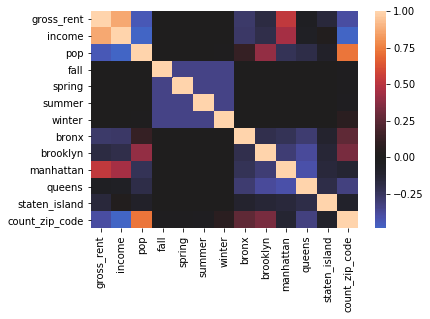

In [284]:
sns.heatmap(data_pred.corr(), center = 0)

In [285]:
data_ols = data_pred.copy()

In [286]:
data_ols.head()

,gross_rent,income,pop,fall,spring,summer,winter,bronx,brooklyn,manhattan,queens,staten_island,count_zip_code
0,645,24610,12468,0,0,0,1,0,1,0,0,0,411
1,705,21553,38938,0,0,0,1,1,0,0,0,0,2272
2,744,31371,43444,0,0,0,1,0,1,0,0,0,1895
3,758,26893,34187,0,0,0,1,0,0,1,0,0,2385
4,851,23962,42779,0,0,0,1,1,0,0,0,0,2887


In [287]:
formula = 'count_zip_code ~ gross_rent+income+pop+fall+spring+summer+winter+bronx+brooklyn+manhattan+queens+staten_island'
model = ols(formula= formula, data=data_ols).fit()

In [288]:
outcome = 'count_zip_code'
predictors = data_ols.drop('count_zip_code', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [289]:
model = ols(formula= formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         count_zip_code   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     123.1
Date:                Thu, 06 Dec 2018   Prob (F-statistic):          2.48e-150
Time:                        11:24:56   Log-Likelihood:                -6365.8
No. Observations:                 755   AIC:                         1.275e+04
Df Residuals:                     744   BIC:                         1.280e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       706.3077    143.077      4.937      0.000     425.425     987.190
gross_rent        0.4949      0.183      2.704      0.007       0.136       0.854
income           -0.0163      0.003     -6.223      0.000      -0.021      -0.011
pop               0.0394      0.002     21.162      0.000       0.036       0.043
fall            104.4801     79.174      1.320      0.187     -50.952     259.912
spring          101.1378     79.200      1.277      0.202     -54.344     256.620
summer           84.6893     78.906      1.073      0.283     -70.215     239.593
winter          416.0005     79.009      5.265      0.000     260.893     571.108
bronx           725.7822    101.952      7.119      0.000     525.634     925.930
brooklyn        238.0544     99.558      2.391      0.017      42.607     433.502
manhattan       299.2708    109.356      2.737      0.006      84.587     513.955
queens         -524.9639     76.062     -6.902      0.000    -674.286    -375.642
staten_island   -31.8357    143.497     -0.222      0.824    -313.543     249.871
==============================================================================
Omnibus:                      103.560   Durbin-Watson:                   2.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.910
Skew:                          -0.443   Prob(JB):                    9.86e-133
Kurtosis:                       7.306   Cond. No.                     1.06e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.09e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""